In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# ***EDA***

In [4]:
df.shape

(20640, 10)

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [9]:
df.duplicated().sum()

0

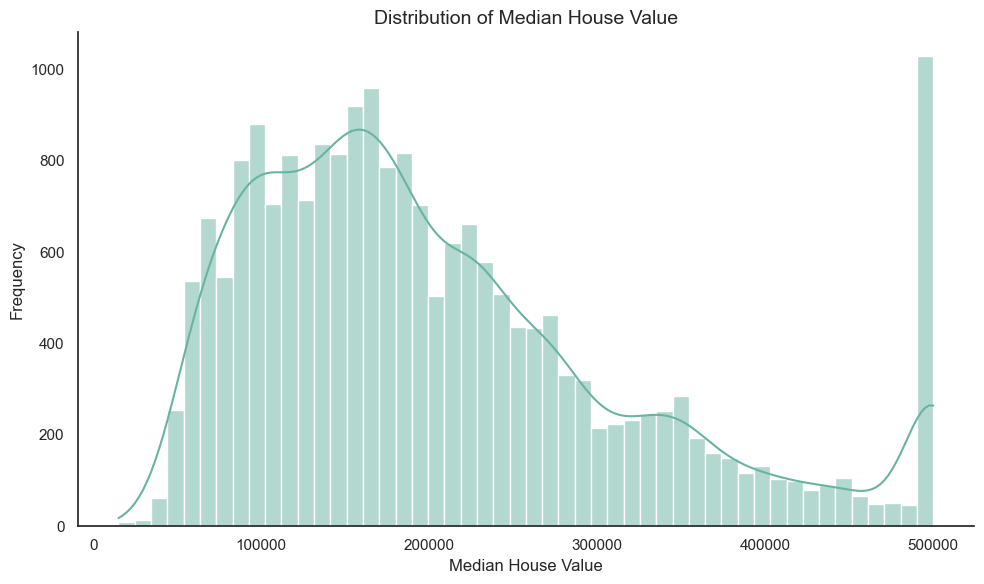

In [14]:
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=50, kde=True, color='#69b3a2', edgecolor=None)
plt.title('Distribution of Median House Value', fontsize=14)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()


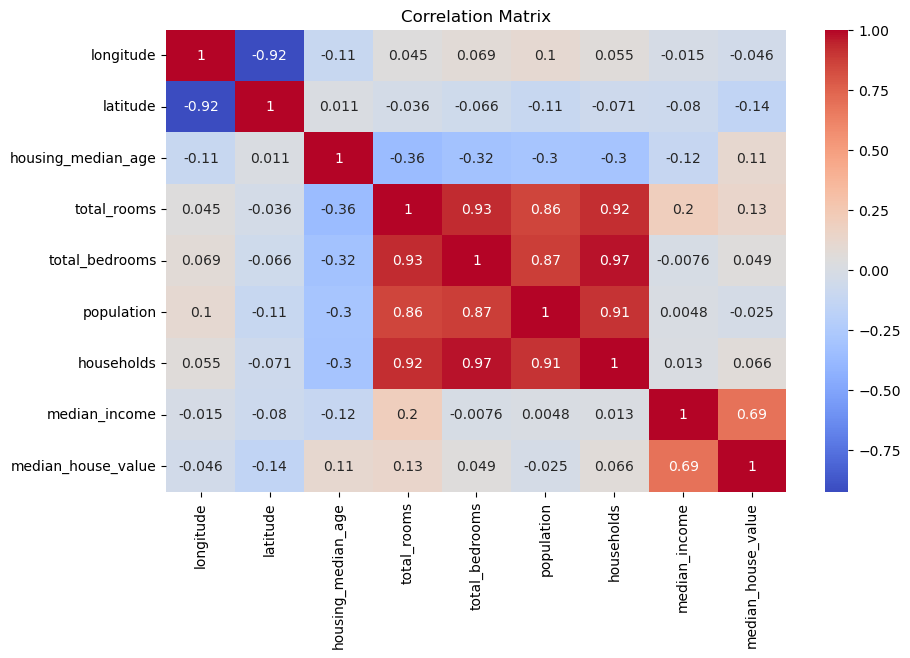

In [12]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

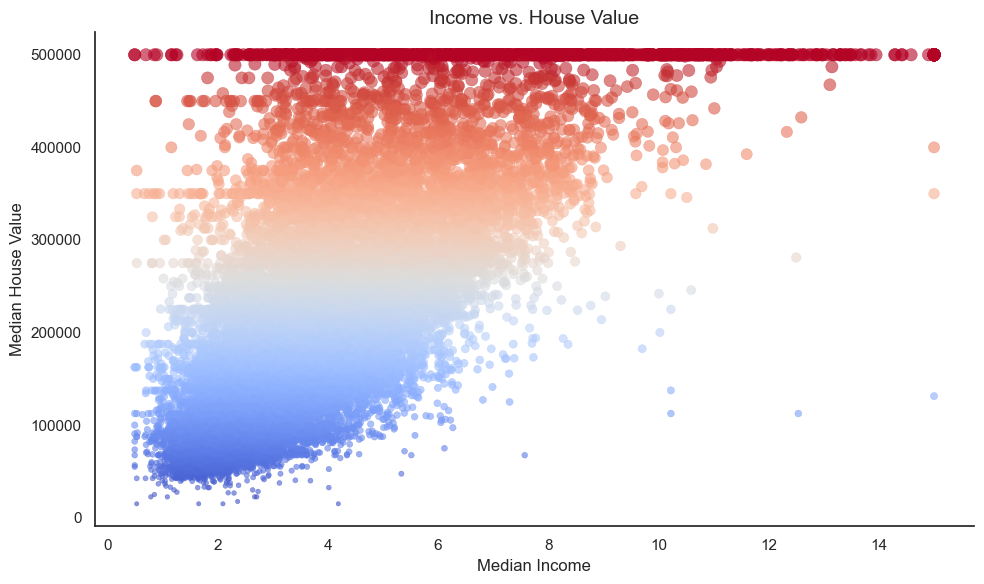

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='median_income',
    y='median_house_value',
    hue='median_house_value',
    palette='coolwarm',
    alpha=0.6,
    edgecolor=None,
    size='median_house_value',
    sizes=(10, 80),
    legend=None  # cleaner look
)
plt.title('Income vs. House Value', fontsize=14)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
sns.despine()
plt.tight_layout()
plt.show()


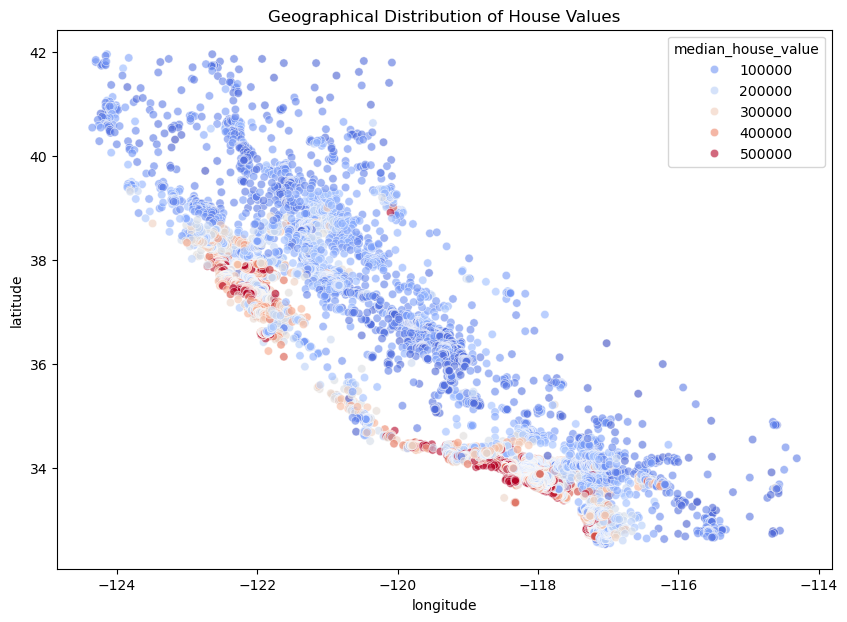

In [59]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='longitude', y='latitude',
                hue='median_house_value', palette='coolwarm', alpha=0.6)
plt.title("Geographical Distribution of House Values")
plt.show()


C:\Users\workstation\AppData\Local\Temp\ipykernel_36016\2231729460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


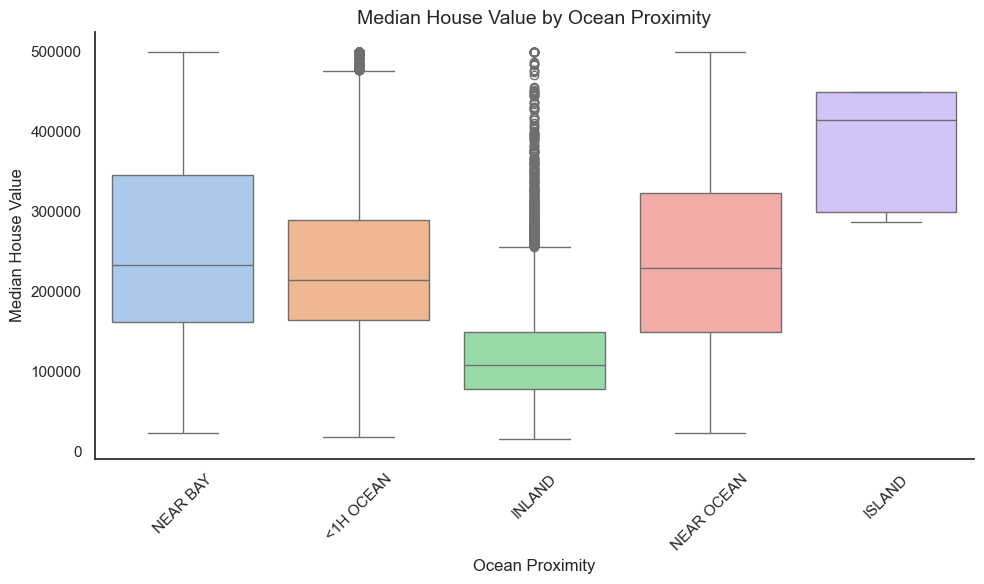

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='ocean_proximity',
    y='median_house_value',
    palette='pastel'
)
plt.title('Median House Value by Ocean Proximity', fontsize=14)
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()


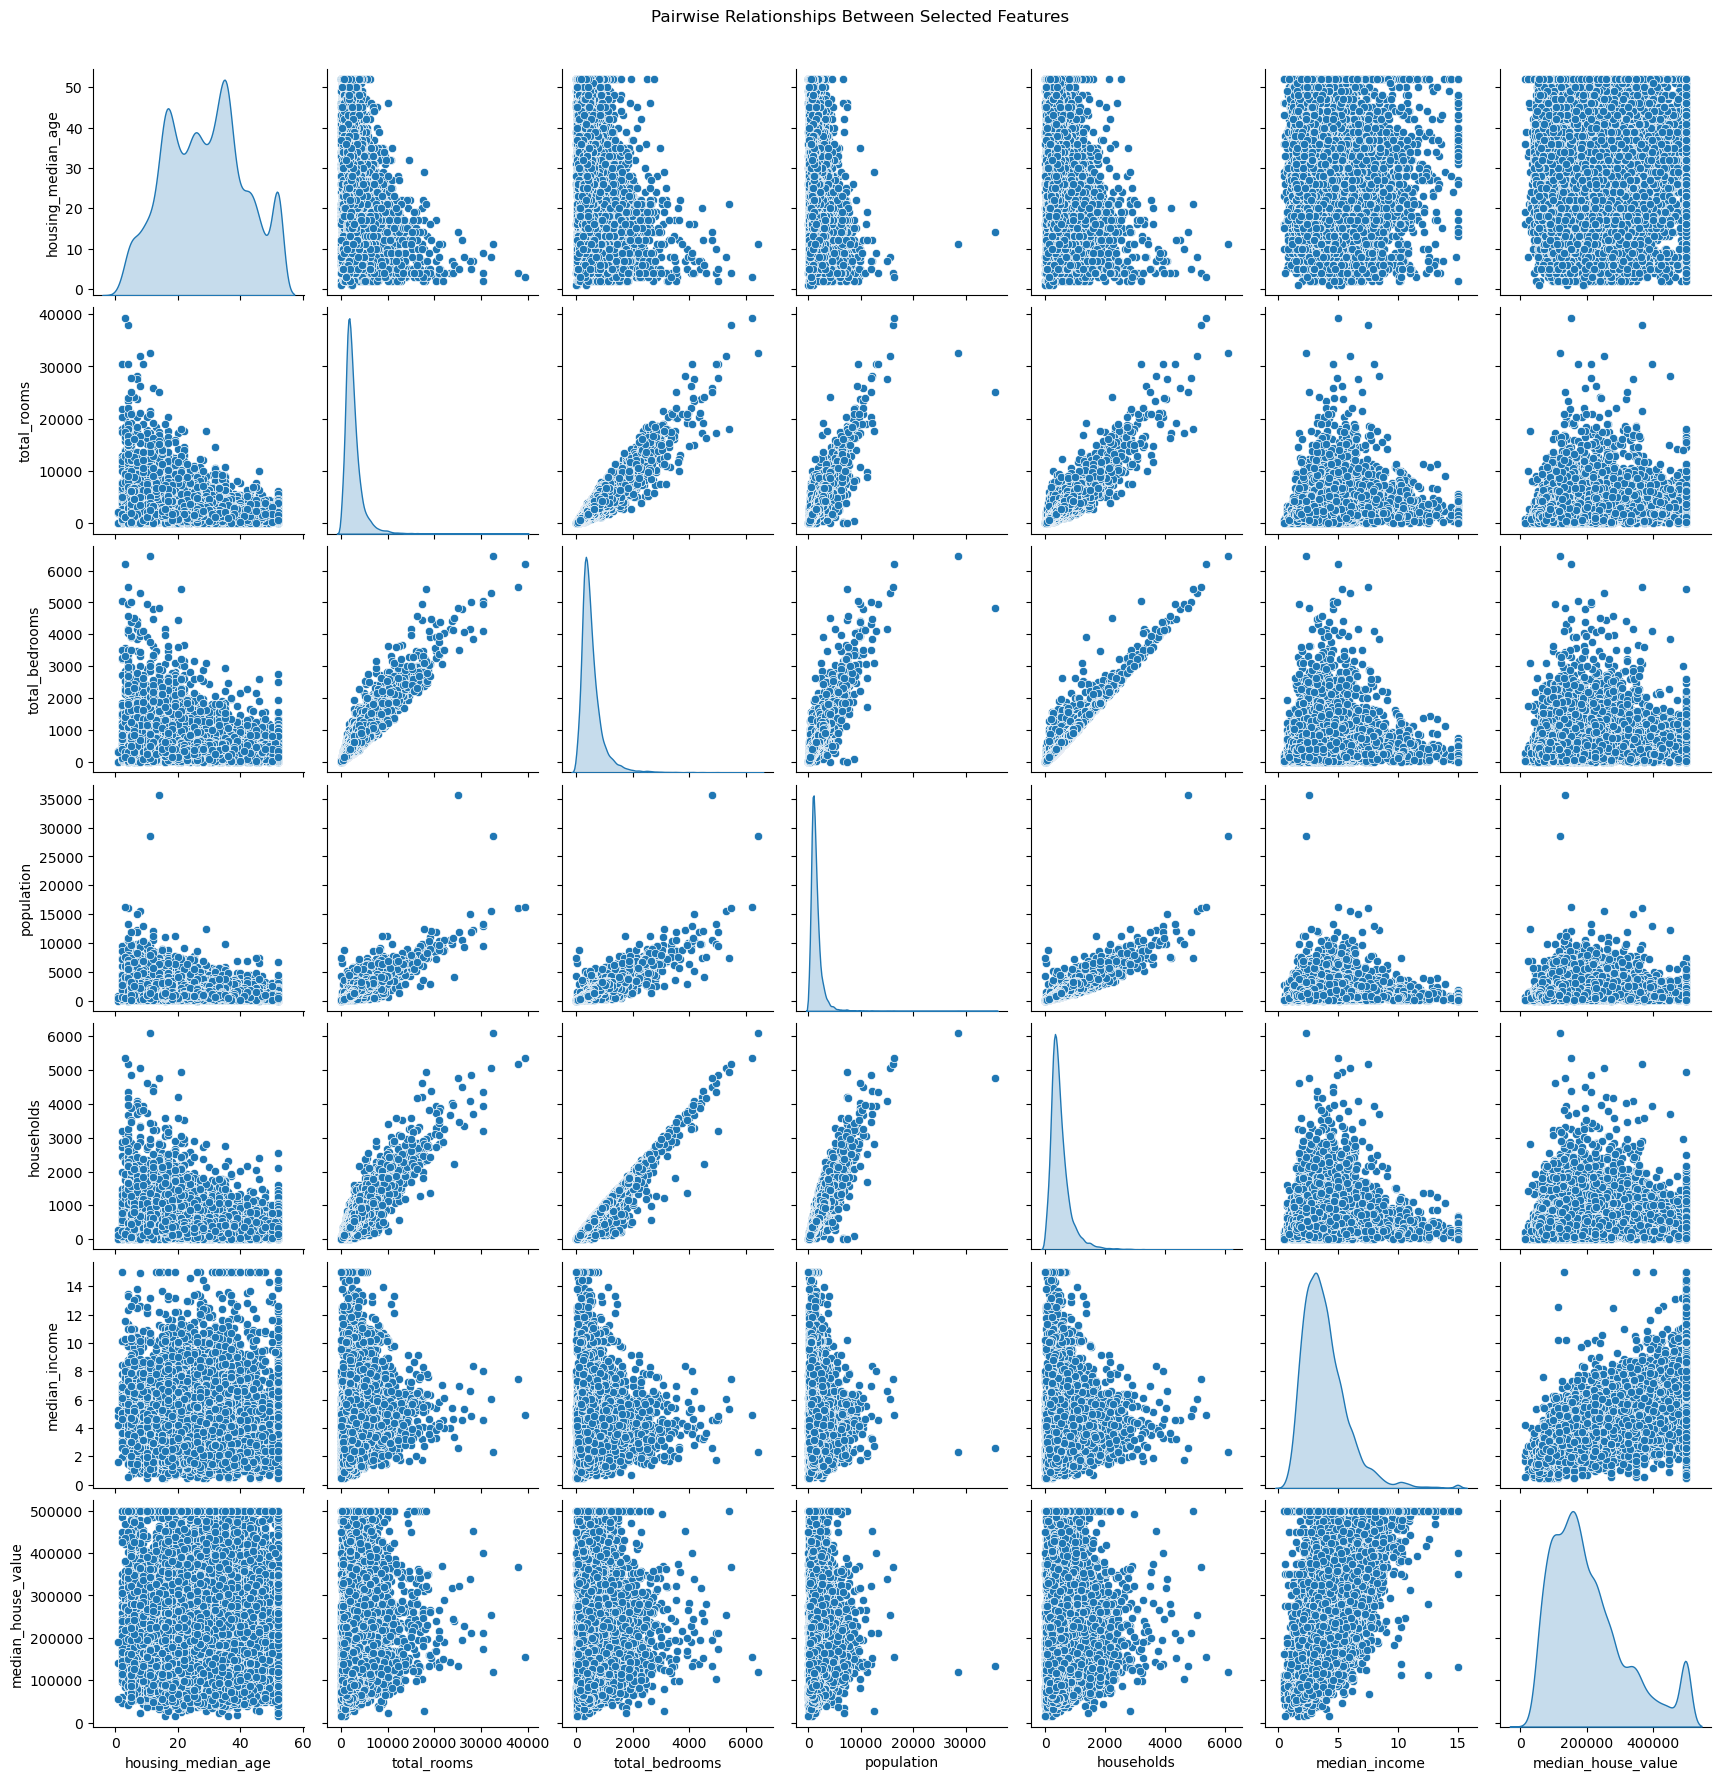

In [60]:
selected_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                 'population', 'households', 'median_income', 'median_house_value']

sns.pairplot(df[selected_cols], diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Selected Features", y=1.02)
plt.show()

In [61]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [62]:
df.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False)

ocean_proximity
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
<1H OCEAN     240084.285464
INLAND        124805.392001
Name: median_house_value, dtype: float64

In [63]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

-----

# **ML Modeling**

In [18]:
X = df.drop('median_house_value', axis=1)

y = df['median_house_value']

In [19]:
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
}

results = []

for name, model in models.items():
    if "Linear" in name or name in ["Ridge", "Lasso"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append({
        "Model": name,
        "R² Score": r2
    })

In [25]:
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
results_df[["Model", "R² Score"]]

,Model,R² Score,RMSE
3,Random Forest,0.816489,49038.209338
4,Gradient Boosting,0.761670,55884.659003
1,Ridge,0.625457,70057.416870
2,Lasso,0.625425,70060.454594
0,Linear Regression,0.625424,70060.521845


# ***Done***